In [1]:
import numpy as np
import pandas as pd
import util_mnist_reader as mnist_reader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer ,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
#Splitting the training data
X_train = X_train[5000:]
y_train = y_train[5000:]

X_val = X_train[:5000]
y_val = y_train[:5000]

In [4]:
#Normalization of Testing data
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
#Categorical data: Y(60000,)->(60000, 10)
y_train = np.array(pd.get_dummies(y_train))
y_test = np.array(pd.get_dummies(y_test))
y_val = np.array(pd.get_dummies(y_val))
# Y = Y.reshape(60000, 10)

In [6]:
#Hyperparameters
epochs = 150
learningrate = 0.6
nodes = 256

In [7]:
#Sigmoid Function: convert matrix values bewteen 0 to 1 
def sigmoid_function(z): 
    return 1 / (1 + np.exp(-z)) 

In [8]:
#Derivative of Sigmoid Function
def der_sigmoid(z): 
    return z * (1-z)

In [9]:
#Softmax function: classes 1-10
def softmax(z):
    ans = np.exp(z)# - np.max(z))
    return ans/np.sum(ans, axis=1, keepdims=True) 

In [10]:
def cost(x, y):
    m = y.shape[0]
    logp=y*np.log(x)
    loss=-np.sum(logp)/m
    return loss

In [11]:
def accuracy(a2,Y):
    acc = 0
    for i in range(len(Y)):
        if(a2[i].argmax()==Y[i].argmax()):
            acc=acc+1
    
    acc=acc/a2.shape[0]
    return acc

In [12]:
#Weights
w1 = np.random.randn(X_train.shape[1], nodes)
w2 = np.random.randn(nodes, 10)

#Baises
b1 = np.random.randn(1, nodes)
b2 = np.random.randn(1, 10)

In [13]:
#Initialising lists to plot graph
loss = []
losstrack = []
losstrack_v = []
accuracy_score_log_train = []
#accuracy_score_log_test = []
accuracy_score_log_val = []

In [14]:
def forward_feed():
    z1 = np.dot(X_train, w1) + b1  
    a1 = sigmoid_function(z1) 
    z2 = np.dot(a1, w2) + b2          
    a2 = softmax(z2)
    return a2,a1

In [15]:
for epoch in range(epochs):  
    a2,a1 = forward_feed()
    losstrack_train = cost(a2, y_train)
    losstrack.append(losstrack_train)
    
    Y_true = np.argmax(y_train, axis=1)
    Y_pred = np.argmax(a2, axis=1)
    
    a2_minus_Y = a2-y_train
    
    dc_dw2 = np.dot(np.transpose(a2_minus_Y),a1)
    dc_dw2 = dc_dw2/X_train.shape[0]
    
    dc_db2 = a2_minus_Y
    
    dc_dw1 = np.dot(np.transpose(np.dot(a2_minus_Y,np.transpose(w2)) * der_sigmoid(a1)),X_train)/X_train.shape[0]
    
    dc_db1 = np.transpose(np.dot(a2_minus_Y,np.transpose(w2)) * der_sigmoid(a1))/X_train.shape[0]
    
    w2 = w2 - learningrate * np.transpose(dc_dw2)
    b2 = b2 - learningrate * np.sum(dc_db2, axis=0)/60000  
    
    w1 = w1 - (np.transpose(dc_dw1))*learningrate
    #w2 = w2 - (np.transpose(dc_dw2))*learningrate
    b1 = b1 - (np.transpose(np.sum(dc_db1)))*learningrate/60000
    #db2_sum = np.sum(dc_db2)
    
    #db2_sum = np.array(pd.get_dummies(db2_sum))
    
    #b2 = b2 - (db2_sum.T)*learningrate
    
    #Validation data
    z1_val = np.dot(X_val, w1) + b1
    a1_val = sigmoid_function(z1_val) 
    z2_val = np.dot(a1_val, w2) + b2          
    a2_val = softmax(z2_val)
    
    accuracy_score_train = accuracy(a2, y_train)
    accuracy_score_log_train.append(accuracy_score_train)
#     print(epoch)
#     print(accuracy_score_train)
    accuracy_score_val = accuracy(a2_val, y_val)
    accuracy_score_log_val.append(accuracy_score_val)
    print(epoch)
    print(accuracy_score_val)
    
    losstrack_val = cost(a2_val, y_val)
    losstrack_v.append(losstrack_val)

0
0.135
1
0.2008
2
0.2422
3
0.2934
4
0.355
5
0.3382
6
0.3786
7
0.3894
8
0.4344
9
0.424
10
0.458
11
0.4708
12
0.4882
13
0.49
14
0.494
15
0.5102
16
0.5152
17
0.512
18
0.5154
19
0.5276
20
0.543
21
0.5416
22
0.5588
23
0.544
24
0.5694
25
0.5604
26
0.5754
27
0.5576
28
0.585
29
0.56
30
0.5878
31
0.561
32
0.5948
33
0.5714
34
0.5964
35
0.5774
36
0.603
37
0.5822
38
0.608
39
0.5858
40
0.6136
41
0.5858
42
0.6172
43
0.5914
44
0.6198
45
0.594
46
0.624
47
0.6004
48
0.6298
49
0.605
50
0.6308
51
0.6104
52
0.634
53
0.6158
54
0.637
55
0.618
56
0.6384
57
0.6214
58
0.6414
59
0.6282
60
0.6476
61
0.6314
62
0.6514
63
0.6358
64
0.654
65
0.638
66
0.6582
67
0.6392
68
0.6596
69
0.6406
70
0.6594
71
0.642
72
0.6646
73
0.6434
74
0.667
75
0.645
76
0.6678
77
0.6472
78
0.6672
79
0.6496
80
0.669
81
0.6496
82
0.669
83
0.6514
84
0.6692
85
0.6544
86
0.6698
87
0.6526
88
0.6694
89
0.6558
90
0.672
91
0.6572
92
0.6762
93
0.6604
94
0.677
95
0.6602
96
0.6756
97
0.6596
98
0.6756
99
0.6636
100
0.6758
101
0.664
102
0.6766
103
0.663

In [16]:
#Calculating accuracy for test data -> building forward pass
z1_test = np.dot(X_test, w1) + b1
a1_test = sigmoid_function(z1_test) 
z2_test = np.dot(a1_test, w2) + b2          
a2_test = softmax(z2_test)
    
accuracy_score_test = accuracy(a2_test, y_test)
print(accuracy_score_test)

0.7182


In [17]:
#Calculating accuracy for Validation data -> building forward pass
# z1_val = np.dot(X_val, w1) + b1
# a1_val = sigmoid_function(z1_val) 
# z2_val = np.dot(a1_val, w2) + b2          
# a2_val = softmax(z2_val)
    
# accuracy_score_val = accuracy(a2_val, y_val)
# accuracy_score_log_val.append(accuracy_score_val)
# print(accuracy_score_val)

In [18]:
print (confusion_matrix(Y_true, Y_pred))

[[4531   87  328  399   24   27   25    5  111    6]
 [  98 4941  130  241   13    7    0    1   11    2]
 [ 188   14 4547   78  476   29   23    9  127    5]
 [ 511  168  143 4406  203   11    9    4   44    0]
 [ 116   55 1855  382 2948    9   43    2   99    3]
 [  50   18   36   33    4 4508    5  477  133  243]
 [1456   41 2184  342  755   35  449    9  234    2]
 [   0    3    8    1    0  405    0 4577   45  449]
 [  80   11  244   80   45  132   14   54 4797   53]
 [  10    9   19   18    1  249    1  366   18 4803]]


In [19]:
print(classification_report(Y_true, Y_pred))

             precision    recall  f1-score   support

          0       0.64      0.82      0.72      5543
          1       0.92      0.91      0.92      5444
          2       0.48      0.83      0.61      5496
          3       0.74      0.80      0.77      5499
          4       0.66      0.53      0.59      5512
          5       0.83      0.82      0.83      5507
          6       0.79      0.08      0.15      5507
          7       0.83      0.83      0.83      5488
          8       0.85      0.87      0.86      5510
          9       0.86      0.87      0.87      5494

avg / total       0.76      0.74      0.71     55000



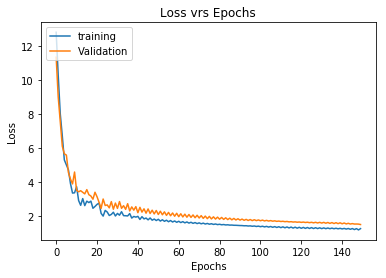

In [20]:
plt.plot(losstrack)
plt.plot(losstrack_v)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vrs Epochs')
plt.legend(['training', 'Validation'], loc='upper left')
plt.show() 


In [21]:
len(accuracy_score_log_val)

150

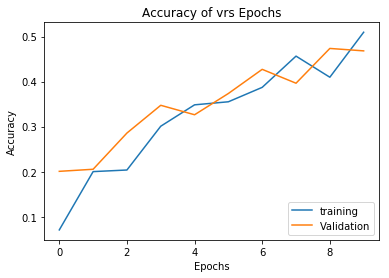

In [25]:
plt.plot(accuracy_score_log_train)
plt.plot(accuracy_score_log_val)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of vrs Epochs')
plt.legend(['training', 'Validation'], loc='lower right')
plt.show()